In [1]:
#import libraries

from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#re-size all the images to this
Image_Size=[224,224]

#train data(images) path
train_path='C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Nuts dataset/train'

#Test data(images) path
valid_path='C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Nuts dataset/test'

In [3]:
inceptionv3=InceptionV3(input_shape=Image_Size+[3],weights='imagenet',
                  include_top=False)

#dont train existing weights
for layer in inceptionv3.layers:
    layer.trainable=False

87910968/87910968 [==============================] - 10s 0us/step


In [4]:
#Gettig number of classes
folders=glob('C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Nuts dataset/train/*')

In [5]:
len(folders)

10

In [6]:
#our layers - you can add more layer if you want
x=Flatten()(inceptionv3.output)

#defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)

In [7]:
model=Model(inputs=inceptionv3.input,outputs=prediction)

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [8]:
#tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [9]:
#to perform image augumentation

from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

#training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Nuts dataset/train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

print()
#testing set
print('Testing length:\n')
test_set=train_datagen.flow_from_directory('C:/Users/jagad/MLA TRAINING/Deep Learning/Daily assignments/Nuts dataset/test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Training length:

Found 1163 images belonging to 10 classes.

Testing length:

Found 50 images belonging to 10 classes.


In [10]:
r=model.fit(training_set,
           validation_data=test_set,
           epochs=5,
           steps_per_epoch=len(training_set),
           validation_steps=len(test_set))

Epoch 1/5
37/37 [==============================] - 255s 6s/step - loss: 13.0227 - accuracy: 0.3603 - val_loss: 1.3707 - val_accuracy: 0.7400
Epoch 2/5
37/37 [==============================] - 236s 6s/step - loss: 2.3302 - accuracy: 0.7059 - val_loss: 0.8680 - val_accuracy: 0.8400
Epoch 3/5
37/37 [==============================] - 244s 7s/step - loss: 1.4871 - accuracy: 0.7790 - val_loss: 0.5177 - val_accuracy: 0.9400
Epoch 4/5
37/37 [==============================] - 209s 6s/step - loss: 1.3464 - accuracy: 0.8186 - val_loss: 1.2655 - val_accuracy: 0.7600
Epoch 5/5
37/37 [==============================] - 192s 5s/step - loss: 1.3615 - accuracy: 0.8229 - val_loss: 1.5554 - val_accuracy: 0.8600


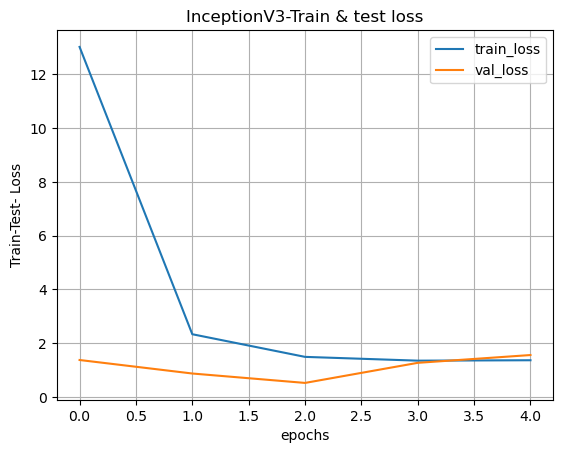

<Figure size 640x480 with 0 Axes>

In [11]:
#loss 
plt.title('InceptionV3-Train & test loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('InceptionV3--Loss& val loss')

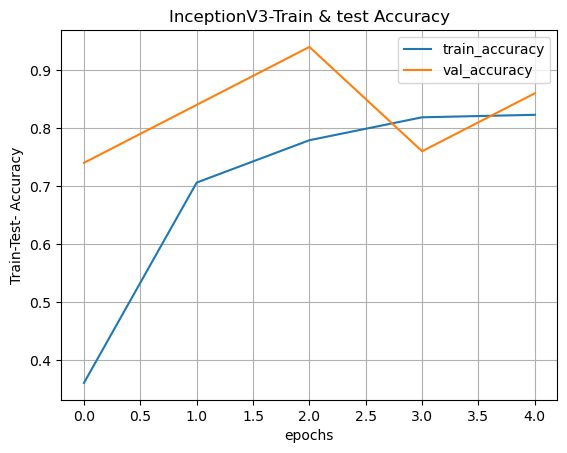

<Figure size 640x480 with 0 Axes>

In [12]:
#loss 
plt.title('InceptionV3-Train & test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('InceptionV3--Accuracy & val Accuracy')

In [14]:
#confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*75)
print('classification report')
print(classification_report(test_set.classes,ypred))
print('='*75)
print('Accuracy score')
print(accuracy_score(test_set.classes,ypred))

2/2 [==============================] - 8s 3s/step
Confusion Matrix
[[0 0 0 0 1 1 1 1 0 1]
 [0 0 1 0 0 0 2 2 0 0]
 [0 0 2 0 0 1 0 0 1 1]
 [0 1 0 2 0 0 1 0 0 1]
 [0 0 0 1 1 0 1 2 0 0]
 [1 1 0 0 0 0 1 0 1 1]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 1 1 0 1 0 1 1 0]
 [1 1 0 1 1 0 0 0 1 0]
 [1 0 1 0 1 0 0 0 0 2]]
classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.40      0.40      0.40         5
           3       0.40      0.40      0.40         5
           4       0.20      0.20      0.20         5
           5       0.00      0.00      0.00         5
           6       0.14      0.20      0.17         5
           7       0.14      0.20      0.17         5
           8       0.20      0.20      0.20         5
           9       0.33      0.40      0.36         5

    accuracy                           0.20        50
   macro avg       0.18      0

<Axes: >

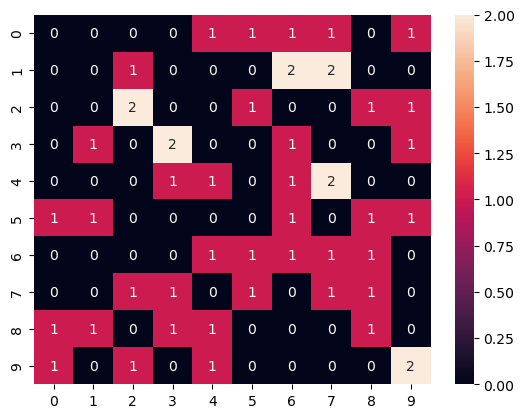

In [15]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True)